# Custoner Churn Prediction for ABC Bank Using Three Different Optimizers
**1. Adam (ADAptive Moment Estimation)**\
**2. RMSProp (Root Mean Square Propagation)**\
**3. Adagrad (Adaptive Gradient)**

In [140]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [83]:
# load data into dataframe
customer_df = pd.read_csv('Customer_churn.csv')
customer_df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [84]:
# dataset info
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [85]:
# statistical summary of data
customer_df.describe()

# average age of the customers is 38 in this Bank
# average tenure is 5 years
# average credict_score is 650, max is 850 and min is 350.
# average balance of all customers is 76485.889288
# bank has total 4 product where most of the customers have only 1.

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [86]:
# dimension of data
customer_df.shape

(10000, 12)

<AxesSubplot:>

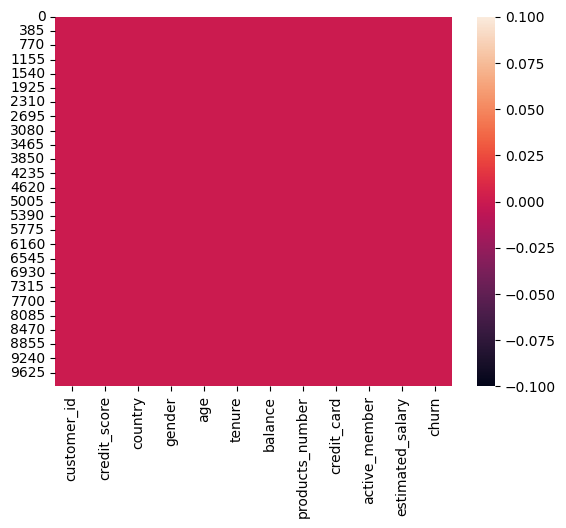

In [87]:
# no null values in dataset
sns.heatmap(customer_df.isnull())

In [88]:
customer_df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='churn', ylabel='count'>

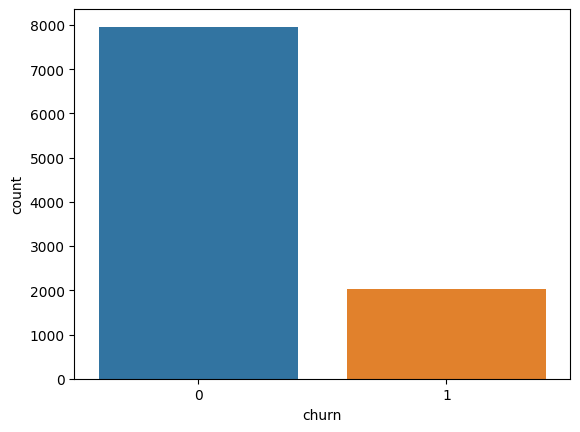

In [89]:
sns.countplot(customer_df['churn'])

In [141]:
# 20 % Churn rate 
customer_df['churn'].value_counts()

0    7963
1    2037
Name: churn, dtype: int64

array([[<AxesSubplot:title={'center':'customer_id'}>,
        <AxesSubplot:title={'center':'credit_score'}>,
        <AxesSubplot:title={'center':'age'}>],
       [<AxesSubplot:title={'center':'tenure'}>,
        <AxesSubplot:title={'center':'balance'}>,
        <AxesSubplot:title={'center':'products_number'}>],
       [<AxesSubplot:title={'center':'credit_card'}>,
        <AxesSubplot:title={'center':'active_member'}>,
        <AxesSubplot:title={'center':'estimated_salary'}>],
       [<AxesSubplot:title={'center':'churn'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

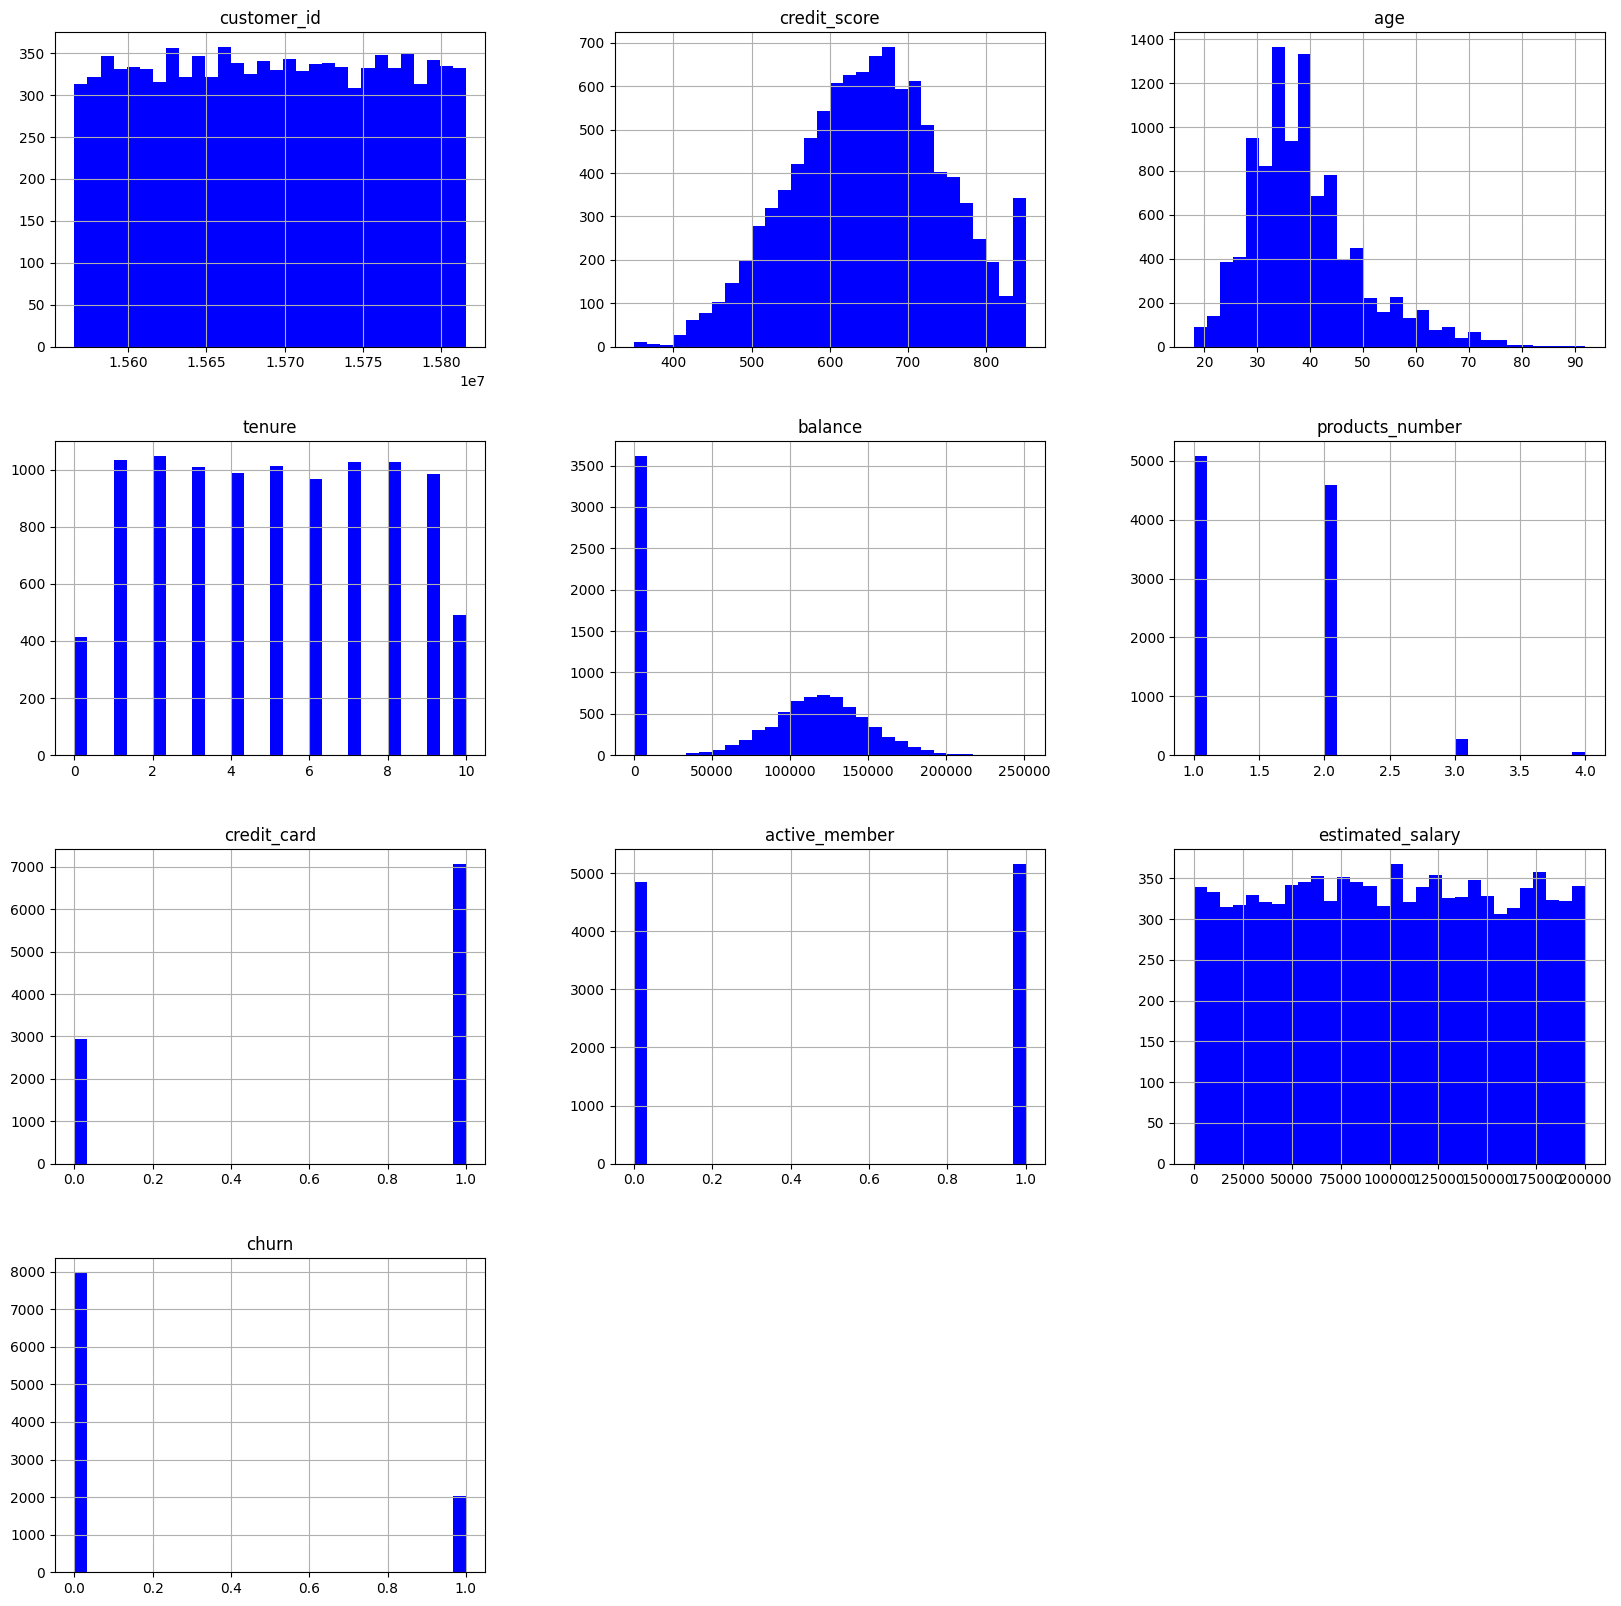

In [25]:
customer_df.hist(bins=30, figsize=(20,20), color='b')

In [ ]:
# Bank has 20% churn rate
# most of the customers are in age 30-45.
# 30% people do not have credit card.
# out of 10,000 customers 4849 (half) of members are in-active bank member.

In [27]:
customer_df['credit_card'].value_counts()

1    7055
0    2945
Name: credit_card, dtype: int64

In [33]:
customer_df['active_member'].value_counts()

1    5151
0    4849
Name: active_member, dtype: int64

In [35]:
customer_df['tenure'].value_counts()

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: tenure, dtype: int64

<AxesSubplot:>

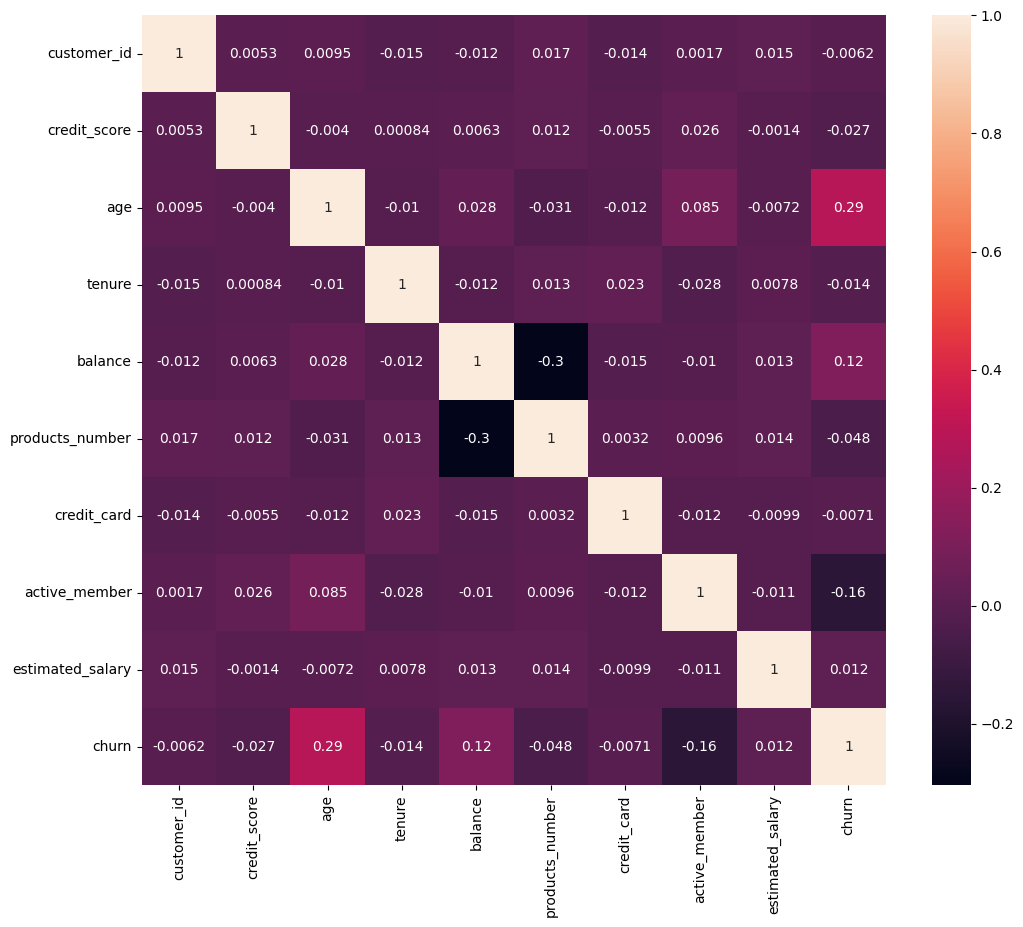

In [32]:
plt.figure(figsize=[12,10])
corr = customer_df.corr()
sns.heatmap(corr, annot = True)

In [36]:
customer_df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='country', ylabel='count'>

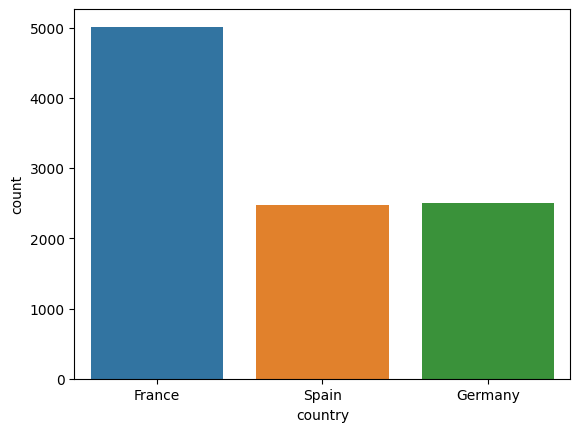

In [37]:
# most of the customers are from France.
sns.countplot(customer_df['country'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='count'>

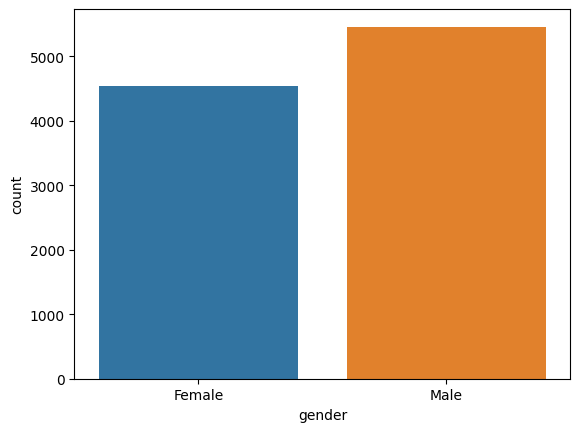

In [38]:
# Bank has more male customers than female. 
sns.countplot(customer_df['gender'])

In [144]:
# make copy of oriniginal df and create a new df
customer_churn_df = customer_df.copy()

In [145]:
customer_churn_df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [146]:
# dropping cutomer_id column
customer_churn_df.drop('customer_id', axis=1, inplace=True)

In [147]:
customer_churn_df.shape

(10000, 11)

## Training data

In [148]:
# feature encoding - covert categorical data into numerical.
customer_churn_df= pd.get_dummies(customer_churn_df,columns=['country','gender'],drop_first=True)
customer_churn_df

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_Germany,country_Spain,gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [149]:
X = customer_churn_df.drop('churn', axis=1)
y = customer_churn_df['churn']

In [150]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: churn, Length: 10000, dtype: int64

In [151]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [152]:
X_train.shape, X_test.shape

((8000, 11), (2000, 11))

In [153]:
y_train.shape, y_test.shape

((8000,), (2000,))

## Feature Scaling

In [154]:
from sklearn.preprocessing import StandardScaler 
Scaler = StandardScaler()
X_trained_scaled = Scaler.fit_transform(X_train)
X_test_scaled = Scaler.transform(X_test)

In [155]:
X_trained_scaled

array([[-1.77105917, -0.37769481, -1.03448652, ..., -0.57985213,
        -0.57888987,  0.90544807],
       [ 0.94757624,  0.29233748,  0.69600281, ..., -0.57985213,
        -0.57888987,  0.90544807],
       [ 0.68915082, -0.95200819, -1.03448652, ..., -0.57985213,
        -0.57888987,  0.90544807],
       ...,
       [-0.43758401, -1.23916488,  1.73429641, ..., -0.57985213,
        -0.57888987,  0.90544807],
       [ 0.52375855, -1.04772709, -1.38058439, ...,  1.7245776 ,
        -0.57888987,  0.90544807],
       [ 0.28600716,  0.29233748, -1.38058439, ..., -0.57985213,
        -0.57888987,  0.90544807]])

In [156]:
X_test_scaled

array([[ 0.63746573,  1.34524535,  0.34990494, ..., -0.57985213,
        -0.57888987,  0.90544807],
       [-1.00611993, -0.37769481,  1.04210067, ..., -0.57985213,
        -0.57888987, -1.10442556],
       [ 1.34038287, -0.37769481, -1.38058439, ..., -0.57985213,
         1.72744428,  0.90544807],
       ...,
       [ 0.56510662, -0.95200819,  0.00380708, ..., -0.57985213,
        -0.57888987, -1.10442556],
       [ 1.21633867, -1.14344599, -1.03448652, ..., -0.57985213,
        -0.57888987, -1.10442556],
       [ 0.62712872,  0.29233748, -1.38058439, ..., -0.57985213,
        -0.57888987, -1.10442556]])


## Train And Evaluate ANN Model 

In [157]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
import time
# from tabulte import tabulate

## Adam

### Define the ANN Model

In [159]:
# Define the ANN model

def create_model():
    model = Sequential()
    
    model.add(Dense(64, activation='relu', input_shape=(11,)))  

    model.add(BatchNormalization())  # Add Batch Normalization layer

    model.add(Dense(128, activation='relu'))  # Increase the number of units in the hidden layer

    model.add(Dropout(0.5))  # Add Dropout layer with a dropout rate of 0.5

    model.add(Dense(64, activation='relu'))

    model.add(Dense(1, activation='sigmoid'))
    
    # Compile the model

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model

In [160]:
# Create the model
model_1 = create_model() 

#Print a summary of the model architecture
model_1.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 64)                768       
                                                                 
 batch_normalization_10 (Bat  (None, 64)               256       
 chNormalization)                                                
                                                                 
 dense_41 (Dense)            (None, 128)               8320      
                                                                 
 dropout_10 (Dropout)        (None, 128)               0         
                                                                 
 dense_42 (Dense)            (None, 64)                8256      
                                                                 
 dense_43 (Dense)            (None, 1)                 65        
                                                     

## Train the Model

In [161]:
# Start the timer
start_time = time.time()

# Train the model on the entire training dataset and save the history
history_adam = model_1.fit(X_trained_scaled, y_train, batch_size=32, epochs=50, verbose=0)

# Calculate the training time
training_time = time.time() - start_time

y_pred = model_1.predict(X_test_scaled)
y_pred = (y_pred > 0.5)

63/63 [==============================] - 0s 3ms/step


## Evaluate the Model

In [162]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model_1.evaluate(X_test_scaled, y_test)


# Print the test loss, accuracy, and training time
print("Test Loss: ", test_loss)
print("Test Accuracy: ", test_accuracy)
print("Training Time: ", training_time, "seconds")


63/63 [==============================] - 0s 3ms/step - loss: 0.3503 - accuracy: 0.8580
Test Loss:  0.3503035604953766
Test Accuracy:  0.8579999804496765
Training Time:  42.629496335983276 seconds


In [163]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.858

<AxesSubplot:>

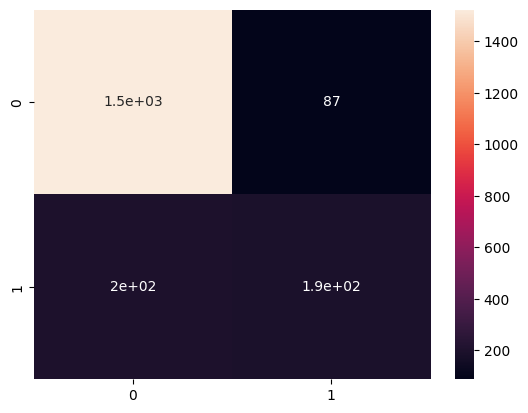

In [164]:
# Testing Set Performance
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [165]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.95      0.91      1610
           1       0.69      0.49      0.58       390

    accuracy                           0.86      2000
   macro avg       0.79      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000



## Generate the table

In [166]:
# Generate the table
from tabulate import tabulate
table_data = []
epochs = [1, 10, 20, 30, 40, 50]

for epoch in epochs:
    val_accuracy = history_adam.history['accuracy'][epoch - 1]
    val_loss = history_adam.history['loss'][epoch - 1]
    table_data.append([f"Epoch {epoch}", f"{val_accuracy:.4f}", f"{val_loss:.4f}"])

table_data.append(["Total Time", "", "", f"{training_time:.2f} seconds"])

# Print the test loss, accuracy, and training time
print("Test Loss: ", test_loss)
print("Test Accuracy: ", test_accuracy)
print("Training Time: ", training_time, "seconds")
# Print the table

headers = ["Epoch", "Test Accuracy", "Test Loss"]
table = tabulate(table_data, headers, tablefmt="grid")
print(table)

Test Loss:  0.3503035604953766
Test Accuracy:  0.8579999804496765
Training Time:  42.629496335983276 seconds
+------------+-----------------+-------------+
| Epoch      | Test Accuracy   | Test Loss   |
+============+=================+=============+
| Epoch 1    | 0.8138          | 0.4466      |
+------------+-----------------+-------------+
| Epoch 10   | 0.8602          | 0.3417      |
+------------+-----------------+-------------+
| Epoch 20   | 0.8649          | 0.3312      |
+------------+-----------------+-------------+
| Epoch 30   | 0.8705          | 0.3195      |
+------------+-----------------+-------------+
| Epoch 40   | 0.8737          | 0.3099      |
+------------+-----------------+-------------+
| Epoch 50   | 0.8781          | 0.2998      |
+------------+-----------------+-------------+
| Total Time |                 |             |
+------------+-----------------+-------------+


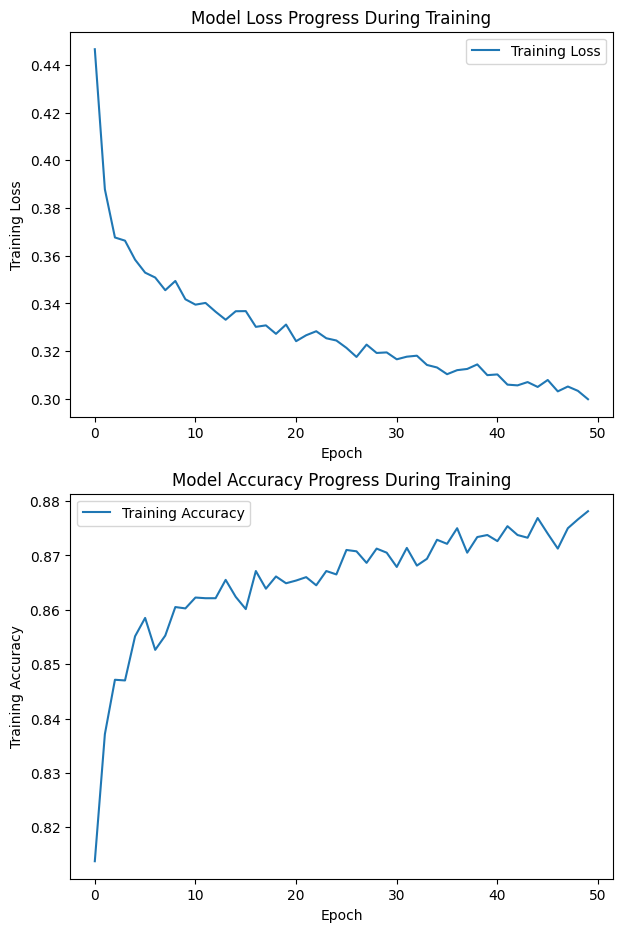

In [191]:
plt.figure(figsize=(7,11))
plt.subplot(2,1,1)
plt.plot(history_adam.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

plt.subplot(2,1,2)
plt.plot(history_adam.history['accuracy'])
plt.title('Model Accuracy Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.legend(['Training Accuracy'])

## RMSProp

In [177]:
# Define the ANN model

def create_model():
    model = Sequential()
    
    model.add(Dense(64, activation='relu', input_shape=(11,)))  

    model.add(BatchNormalization())  # Add Batch Normalization layer

    model.add(Dense(128, activation='relu'))  # Increase the number of units in the hidden layer

    model.add(Dropout(0.5))  # Add Dropout layer with a dropout rate of 0.5

    model.add(Dense(64, activation='relu'))

    model.add(Dense(1, activation='sigmoid'))
    
    # Compile the model

    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

    return model

In [178]:
# Create the model
model_2 = create_model() 

#Print a summary of the model architecture
model_2.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 64)                768       
                                                                 
 batch_normalization_11 (Bat  (None, 64)               256       
 chNormalization)                                                
                                                                 
 dense_45 (Dense)            (None, 128)               8320      
                                                                 
 dropout_11 (Dropout)        (None, 128)               0         
                                                                 
 dense_46 (Dense)            (None, 64)                8256      
                                                                 
 dense_47 (Dense)            (None, 1)                 65        
                                                     

## Train the Model

In [179]:
# Start the timer
start_time = time.time()

# Train the model on the entire training dataset and save the history
history_rmsprop = model_2.fit(X_trained_scaled, y_train, batch_size=32, epochs=50, verbose=0)

# Calculate the training time
training_time = time.time() - start_time

In [180]:
y_pred = model.predict(X_test_scaled)
y_pred = (y_pred > 0.5)

63/63 [==============================] - 0s 3ms/step


## Evaluate the Model

In [185]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model_2.evaluate(X_test_scaled, y_test)


# Print the test loss, accuracy, and training time
print("Test Loss: ", test_loss)
print("Test Accuracy: ", test_accuracy)
print("Training Time: ", training_time, "seconds")

63/63 [==============================] - 0s 3ms/step - loss: 0.3557 - accuracy: 0.8570
Test Loss:  0.35569924116134644
Test Accuracy:  0.8569999933242798
Training Time:  41.81503438949585 seconds


In [186]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.843

<AxesSubplot:>

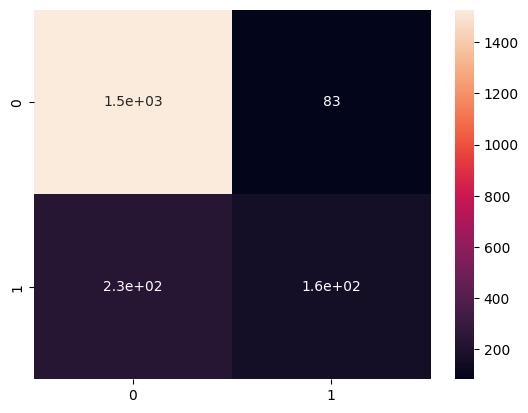

In [187]:
# Testing Set Performance
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [188]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1610
           1       0.66      0.41      0.50       390

    accuracy                           0.84      2000
   macro avg       0.76      0.68      0.70      2000
weighted avg       0.83      0.84      0.83      2000



##  Generate the table

In [189]:
# Generate the table
from tabulate import tabulate
table_data = []
epochs = [1, 10, 20, 30, 40, 50]

for epoch in epochs:
    val_accuracy = history_rmsprop.history['accuracy'][epoch - 1]
    val_loss = history_rmsprop.history['loss'][epoch - 1]
    table_data.append([f"Epoch {epoch}", f"{val_accuracy:.4f}", f"{val_loss:.4f}"])

table_data.append(["Total Time", "", "", f"{training_time:.2f} seconds"])

# Print the test loss, accuracy, and training time
print("Test Loss: ", test_loss)
print("Test Accuracy: ", test_accuracy)
print("Training Time: ", training_time, "seconds")
# Print the table

headers = ["Epoch", "Test Accuracy", "Test Loss"]
table = tabulate(table_data, headers, tablefmt="grid")
print(table)

Test Loss:  0.35569924116134644
Test Accuracy:  0.8569999933242798
Training Time:  41.81503438949585 seconds
+------------+-----------------+-------------+
| Epoch      | Test Accuracy   | Test Loss   |
+============+=================+=============+
| Epoch 1    | 0.8055          | 0.4528      |
+------------+-----------------+-------------+
| Epoch 10   | 0.8584          | 0.3479      |
+------------+-----------------+-------------+
| Epoch 20   | 0.8622          | 0.3386      |
+------------+-----------------+-------------+
| Epoch 30   | 0.8668          | 0.3288      |
+------------+-----------------+-------------+
| Epoch 40   | 0.8700          | 0.3279      |
+------------+-----------------+-------------+
| Epoch 50   | 0.8708          | 0.3200      |
+------------+-----------------+-------------+
| Total Time |                 |             |
+------------+-----------------+-------------+


In [190]:
history_rmsprop.history.keys()

dict_keys(['loss', 'accuracy'])

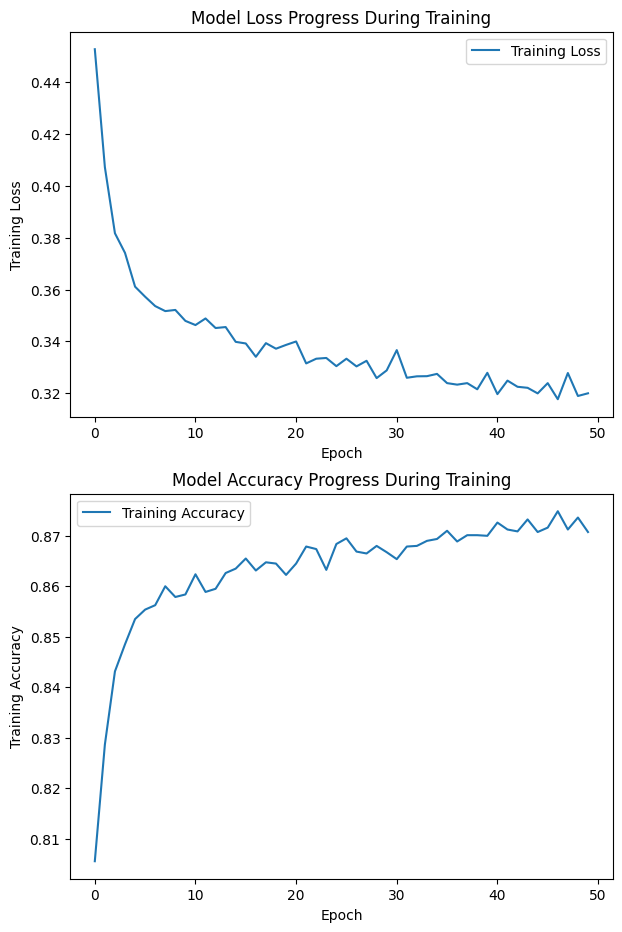

In [192]:
plt.figure(figsize=(7,11))
plt.subplot(2,1,1)
plt.plot(history_rmsprop.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

plt.subplot(2,1,2)
plt.plot(history_rmsprop.history['accuracy'])
plt.title('Model Accuracy Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.legend(['Training Accuracy'])

## Adagrad

### Define the ANN Model

In [193]:
# Define the ANN model

def create_model():
    model = Sequential()
    
    model.add(Dense(64, activation='relu', input_shape=(11,)))  

    model.add(BatchNormalization())  # Add Batch Normalization layer

    model.add(Dense(128, activation='relu'))  # Increase the number of units in the hidden layer

    model.add(Dropout(0.5))  # Add Dropout layer with a dropout rate of 0.5

    model.add(Dense(64, activation='relu'))

    model.add(Dense(1, activation='sigmoid'))
    
    # Compile the model

    model.compile(optimizer='adagrad', loss='binary_crossentropy', metrics=['accuracy'])

    return model

In [194]:
# Create the model
model_3 = create_model() 

#Print a summary of the model architecture
model_3.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 64)                768       
                                                                 
 batch_normalization_12 (Bat  (None, 64)               256       
 chNormalization)                                                
                                                                 
 dense_49 (Dense)            (None, 128)               8320      
                                                                 
 dropout_12 (Dropout)        (None, 128)               0         
                                                                 
 dense_50 (Dense)            (None, 64)                8256      
                                                                 
 dense_51 (Dense)            (None, 1)                 65        
                                                     

## Train the Model

In [195]:
# Start the timer
start_time = time.time()

# Train the model on the entire training dataset and save the history
history_adagrad = model_3.fit(X_trained_scaled, y_train, batch_size=32, epochs=50, verbose=0)

# Calculate the training time
training_time = time.time() - start_time

In [196]:
y_pred = model_3.predict(X_test_scaled)
y_pred = (y_pred > 0.5)

63/63 [==============================] - 0s 3ms/step


## Evaluate the model

In [197]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model_3.evaluate(X_test_scaled, y_test)


# Print the test loss, accuracy, and training time
print("Test Loss: ", test_loss)
print("Test Accuracy: ", test_accuracy)
print("Training Time: ", training_time, "seconds")


63/63 [==============================] - 0s 3ms/step - loss: 0.3882 - accuracy: 0.8390
Test Loss:  0.38822194933891296
Test Accuracy:  0.8389999866485596
Training Time:  37.47569918632507 seconds


In [198]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.839

<AxesSubplot:>

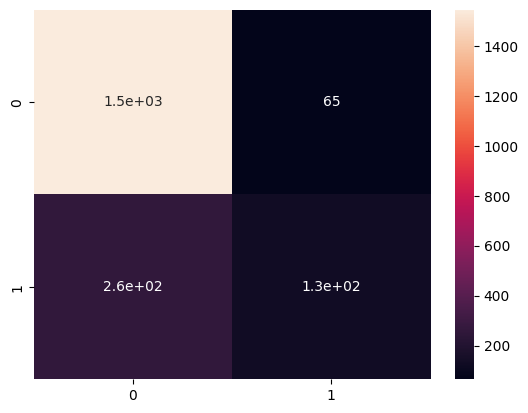

In [206]:
# Testing Set Performance
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [199]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1610
           1       0.67      0.34      0.45       390

    accuracy                           0.84      2000
   macro avg       0.76      0.65      0.68      2000
weighted avg       0.82      0.84      0.82      2000



## Generate the table

In [200]:
# Generate the table
from tabulate import tabulate
table_data = []
epochs = [1, 10, 20, 30, 40, 50]

for epoch in epochs:
    val_accuracy = history_adagrad.history['accuracy'][epoch - 1]
    val_loss = history_adagrad.history['loss'][epoch - 1]
    table_data.append([f"Epoch {epoch}", f"{val_accuracy:.4f}", f"{val_loss:.4f}"])

table_data.append(["Total Time", "", "", f"{training_time:.2f} seconds"])

# Print the test loss, accuracy, and training time
print("Test Loss: ", test_loss)
print("Test Accuracy: ", test_accuracy)
print("Training Time: ", training_time, "seconds")
# Print the table

headers = ["Epoch", "Test Accuracy", "Test Loss"]
table = tabulate(table_data, headers, tablefmt="grid")
print(table)

Test Loss:  0.38822194933891296
Test Accuracy:  0.8389999866485596
Training Time:  37.47569918632507 seconds
+------------+-----------------+-------------+
| Epoch      | Test Accuracy   | Test Loss   |
+============+=================+=============+
| Epoch 1    | 0.7232          | 0.5795      |
+------------+-----------------+-------------+
| Epoch 10   | 0.8035          | 0.4553      |
+------------+-----------------+-------------+
| Epoch 20   | 0.8059          | 0.4396      |
+------------+-----------------+-------------+
| Epoch 30   | 0.8124          | 0.4310      |
+------------+-----------------+-------------+
| Epoch 40   | 0.8202          | 0.4205      |
+------------+-----------------+-------------+
| Epoch 50   | 0.8232          | 0.4097      |
+------------+-----------------+-------------+
| Total Time |                 |             |
+------------+-----------------+-------------+


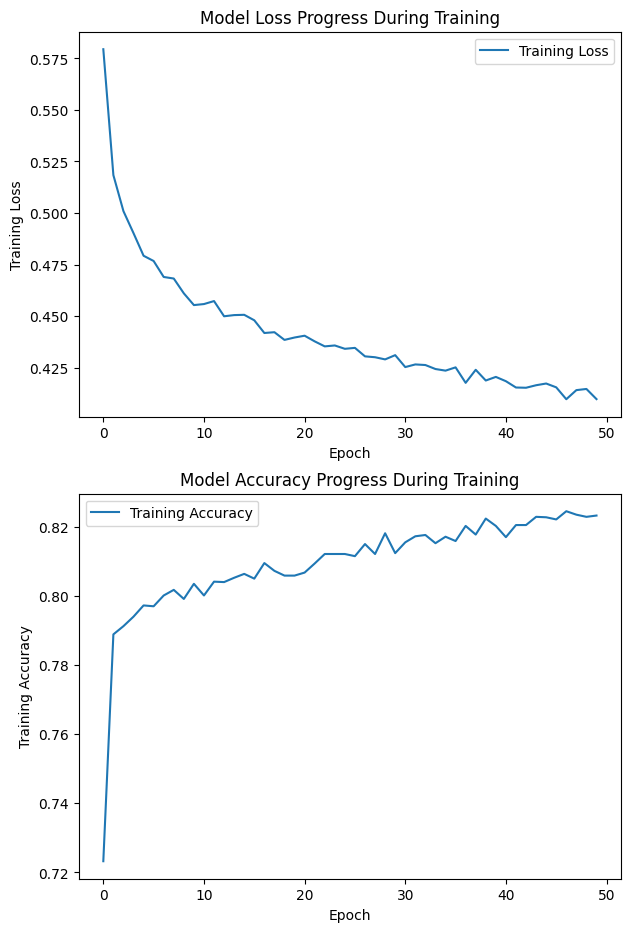

In [201]:
plt.figure(figsize=(7,11))
plt.subplot(2,1,1)
plt.plot(history_adagrad.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

plt.subplot(2,1,2)
plt.plot(history_adagrad.history['accuracy'])
plt.title('Model Accuracy Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.legend(['Training Accuracy'])

## Optimizers Comparision

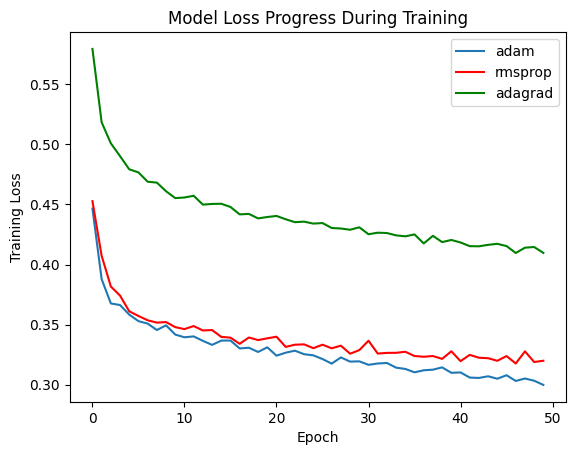

In [202]:
plt.plot(history_adam.history['loss'])
plt.plot(history_rmsprop.history['loss'], color='r')
plt.plot(history_adagrad.history['loss'], color='g')
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])
plt.legend(["adam","rmsprop", "adagrad"], loc ="upper right")

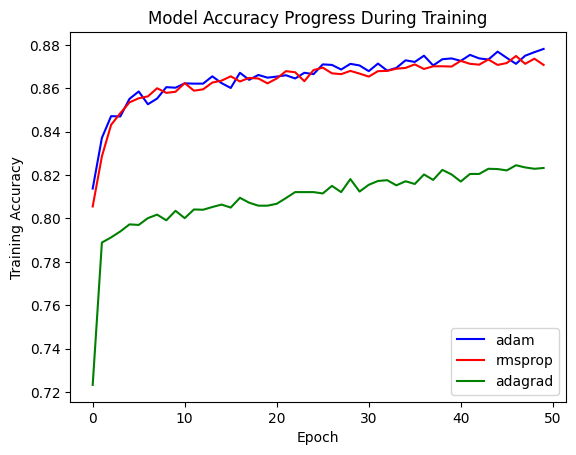

In [203]:
plt.plot(history_adam.history['accuracy'], color='b')
plt.plot(history_rmsprop.history['accuracy'], color='r')
plt.plot(history_adagrad.history['accuracy'], color='g')
plt.title('Model Accuracy Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.legend(["adam","rmsprop", "adagrad"], loc ="lower right")